# Linear Discriminant Analysis

## Table of Content

1. [Introduction to Linear Discriminant Analysis](#section1)<br>
    - 1.1 [What is Dimensionality Reduction?](#section101)<br>
    - 1.2 [Linear DIscriminant Analysis](#section102)<br>
        - 1.2.1 [Purpose of LDA](#section103)<br>
        - 1.2.2 [Understanding using example](#section104)<br>
        - 1.2.3 [LDA Applications](#section105)<br>
        - 1.2.4 [PCA vs LDA](#section106)<br>
2. [Use Case : IBM Attrition and Performance](#section2)<br>
3. [Data loading and description](#section3)<br>
4. [Exploratory Data Analysis](#section4)<br>
5. [Dimensionality Reduction](#section5)<br>
6. [Modelling and Prediction](#section6)<br>
7. [Computing time difference between the different models created](#section7)
8. [Applying KNN, SVM and Decision Tree and comparing using accuracy score](#section8)
9. [Conclusion](#section9)

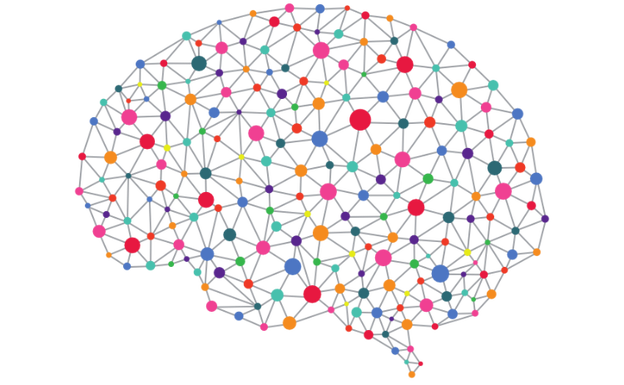

<a id=section101></a>
### What is Dimensionality Reduction?

- Most of the time, we deal with datasets having lots of __redundant parameters__ that don’t provide significant amount of new information to us. 
- Using these parameters in /__building our model won’t help in increasing our accuracy for prediction__ and may __decrease__ too!

- One way to deal with it could be by __deleting__ these parameters but this would __lead to significant data loss__ if there are many such parameters.

Hence, dimensionality reduction comes into the picture.

Differenct techniques for Dimensionality Reduction:
- Principal Component Analysis (PCA)
- Linear Discriminant Analysis (LDA)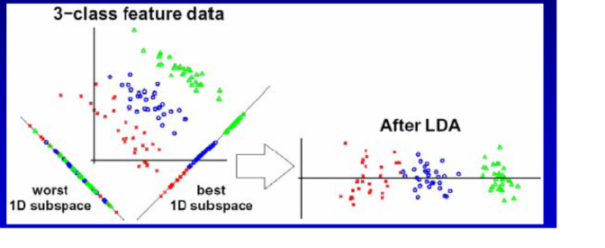

<a id=section102></a>
### Linear Discriminant Analysis

Linear Discriminant Analysis is a __dimensionality reduction__ technique used as a __preprocessing step__ in Machine Learning and __pattern classification applications__.

The main goal of dimensionality reduction techinques is to __reduce the dimensions__ by removing the reduntant and dependent features by transforming the features from __higher dimensional__ space to a space with __lower dimensions__.

Linear Discriminant Analysis is a __supervised classification technique__ which takes labels into consideration.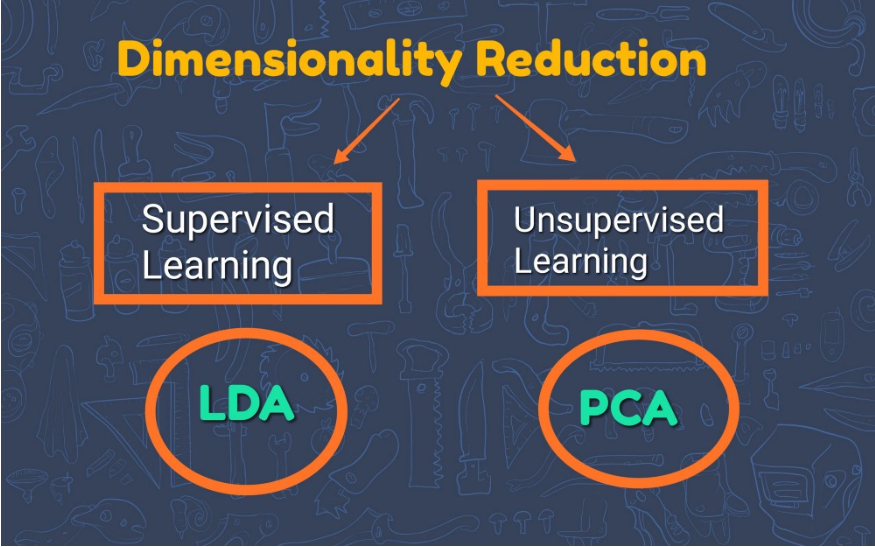

Unlike PCA, where our goal was to __retain maximum variance__, here we try to project a dataset onto a lower dimensional space with __good class seperability__ in order to avoid overfitting.

<a id=section103></a>
### Purpose of LDA

The purpose of Discriminant Analysis is to __classify__ objects (people, customers, things, etc) into one of two or more groups based on a __set of features__ that __describe__ the objects (e.g. gender, age, income, weight, preference score, etc.).<br>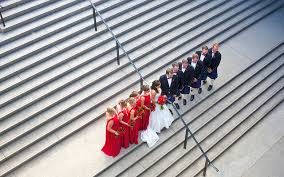
In general, we assign an object to one of a number of predetermined groups __based on observations made on the object__.<br><br>
- Always keep in mind that the __groups__ are _known or predetermined_ and do not have order.<br> 
- The classification problem gives several objects with a set features measured from those objects.<br><br>

What are we looking for is two things:

1. Which __set of features__ can best determine group membership of the object?
2. What is the classification __rule__ or __model__ to best seperate those groups?

<a id=section104></a>
### Understanding with example

For example, we want to know whether a soap product is good or bad based on several measurements on the product such as weight, volume, __people's preferential score__, smell, color contrast etc. The object here is soap. the class category or the group __"good" and "bad"__ is what we are looking for(it is also called __dependent variable__). Each measurement on the product is called __features__ that describe the object(it isa lso called independent variable).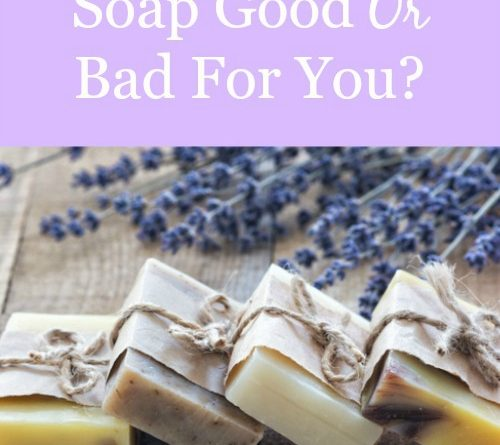

Thus, in discriminant analysis, the dependent variable(Y) is the group and the independent variables(X) are the object features that might describe that group. The depepndent variable is always category(nominal scale) variable while the indepepndent variables can be any measurement scale.

If we assume that the groups are linearly seperable, we can use linear discriminant model(LDA). Linearly seperable suggests that the groups can be seperated by a linear combination of features that describe the objects. If only two features, the seperators between ojects group will become lines. If the features are three, the seperator is a plane and the number of features(i.e. independent variables) is more than 3, the seperatores, become a hyper-plane

<a id=section105></a>
### LDA Applications

Discriminant analysis has been successfully used for many applications. <br>As long as we can transform the problem into a classification problem, we may apply the technique. <br>We may use Discriminant analysis for original applications if you have new additional combinantion of features and objects that may never been considered by other people before. <br>Here are a few fields and examples:

| Applications | Description | Images |
| --- | --- | --- |
| __Identification__ | To __identify__ type of customers that is __likely to buy__ certain product in a store | ![image.png](https://raw.githubusercontent.com/insaid2018/Term-4/master/images/buy_or_not.png) |
| __Decision Making__ | Doctor __diagnosing illness__ may see whuch disease the patient has | ![image.png](https://raw.githubusercontent.com/insaid2018/Term-4/master/images/hiv-positive-negative-3961118.jpg) |
| __Prediction__ | __Will it rain today__ can be tought as prediction | ![image.png](https://raw.githubusercontent.com/insaid2018/Term-4/master/images/prediction.jpg) |
| __Pattern recognition__ | To __distinguish__ pedestrians from dogs and cars on captured image | ![image.png](https://raw.githubusercontent.com/insaid2018/Term-4/master/images/pattern_recog.jpg) |
| __Learning__ | Scientist want to __teach robot__ to learn to talk | ![image.png](https://raw.githubusercontent.com/insaid2018/Term-4/master/images/scientific.jpg) |

<a id=section106></a>
### PCA vs LDA

The difference between the choice of lower dimension space for projecting dataset is evident. If we use PCA on the dataset, it will select a line similar to the decision boundary as it will have maximum variance along it. 
In practice, often LDA is done after performing PCA.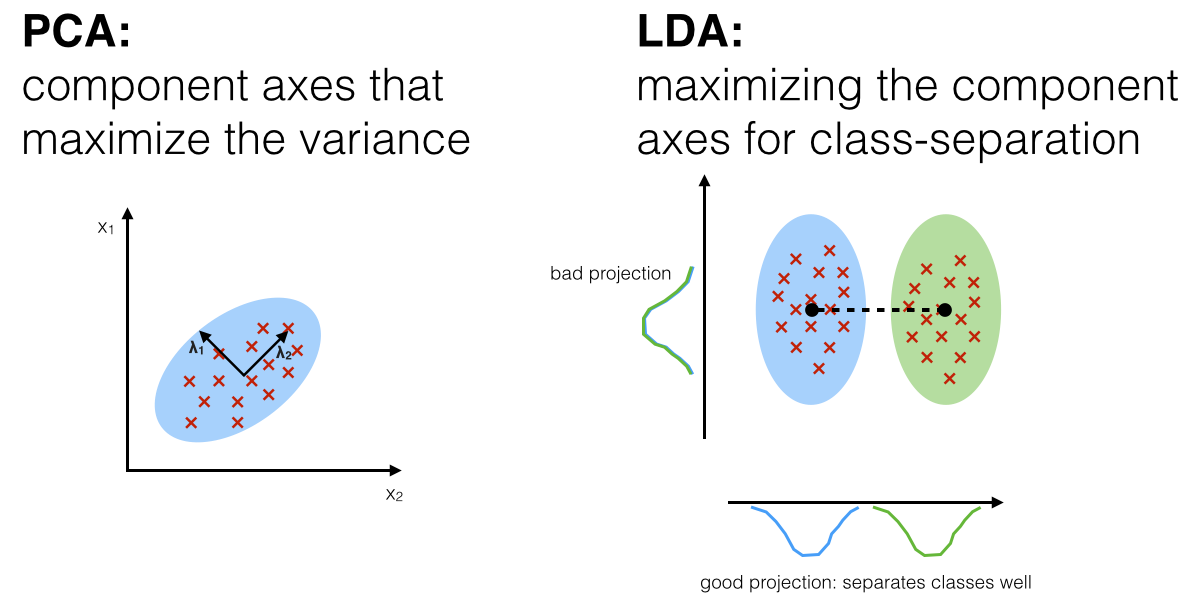

<a id=section2></a>
## Use Case : IBM Attrition and Performance ( HR Analytics)

Uncover the factors that lead to employee attrition and explore important questions such as ‘show me a breakdown of distance from home by job role and attrition’ or ‘compare average monthly income by education and attrition’. This is a fictional data set created by IBM data scientists.

__Education__
1. Below College 
2. College 
3. Bachelor 
4. Master 
5. Doctor

__EnvironmentSatisfaction__
1. Low
2. Medium
3. High
4. Very High

__JobInvolvement__ 
1. Low
2. Medium
3. High
4. Very High

__JobSatisfaction__
1. Low
2. Medium
3. High
4. Very High

__PerformanceRating__
1. Low
2. Good
3. Excellent
4. Outstanding

__RelationshipSatisfaction__ 
1. Low
2. Medium
3. High
4. Very High

__WorkLifeBalance__
1. Bad
2. Good
3. Better
4. Best
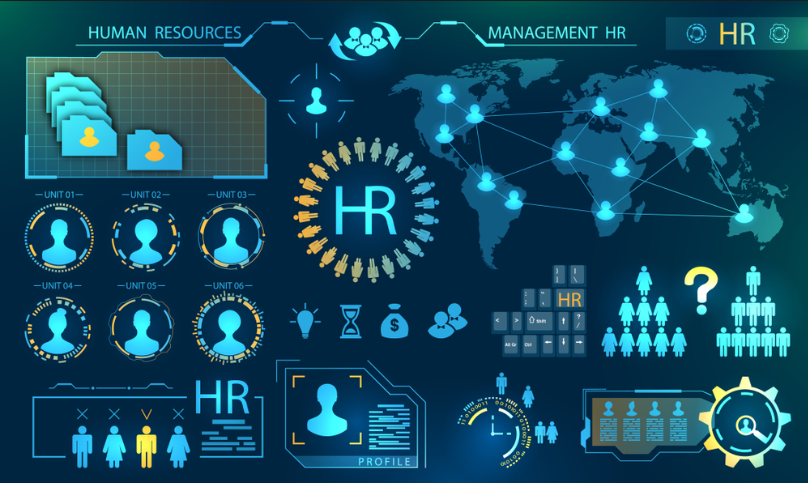

<a id=section3></a>
### Data Loading and description

### Import packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from collections import Counter
import time

### Import dataset

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/Karkerayashish/Machine-Learning/master/LDA/Attrition_LDA.csv')
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


The above data consists of a dependent variable Attrition and others as independent variables. Exploring the data would provide explain which model to use.

# Data Exploration

### Correlation heatmap

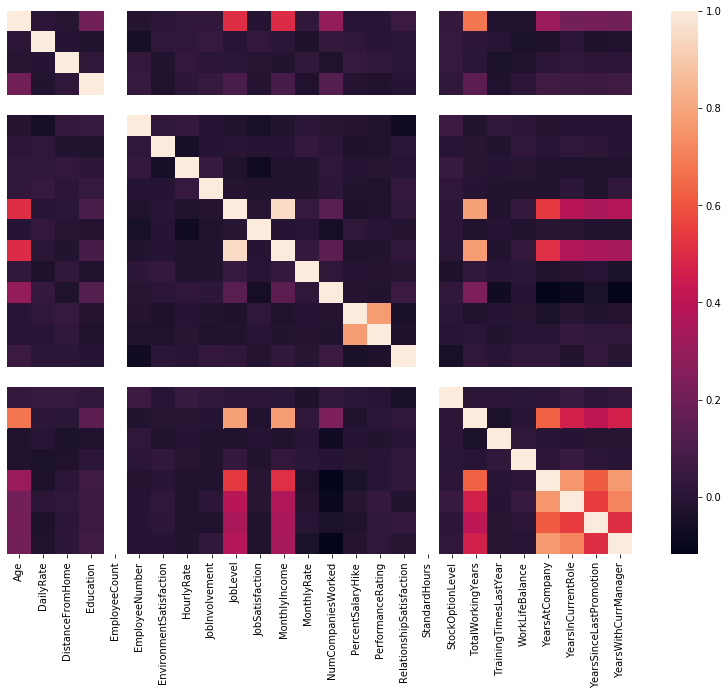

In [3]:
plt.figure(figsize=(14,10))
sns.heatmap(data.corr(),yticklabels=False,cbar=True,linewidths=0)
plt.show()

In [99]:
data.corr()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,-0.018519,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,0.001212,...,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,-0.027853,...,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,-0.012630,...,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,NaN,-0.018519,0.001212,-0.027853,-0.012630,1.000000,...,0.021642,NaN,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281


In [4]:
corr1 = data.corr().abs()
corr1[corr1 == 1] = 0
corr_cols = corr1.unstack().sort_values(ascending=False).drop_duplicates()

corr_df = pd.DataFrame(corr_cols[corr_cols > 0.75])
corr_df

,,0
MonthlyIncome,JobLevel,0.950300
TotalWorkingYears,JobLevel,0.782208
PercentSalaryHike,PerformanceRating,0.773550
TotalWorkingYears,MonthlyIncome,0.772893
YearsWithCurrManager,YearsAtCompany,0.769212
YearsInCurrentRole,YearsAtCompany,0.758754


The above data shows there is a severe correlation in the data. Dropping these features may cause to lose enough information. We will try using decomposition to solve this problem.

### Kernel Density distribution of Daily Rate against EducationalField.

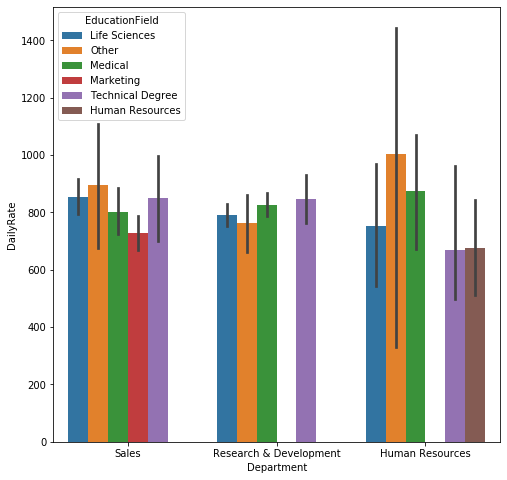

In [5]:
plt.figure(figsize=(8,8))
sns.barplot(x=data['Department'],y=data['DailyRate'],hue=data['EducationField'])
plt.show()

### Visualize count of Yes and No in the Attrition variable.

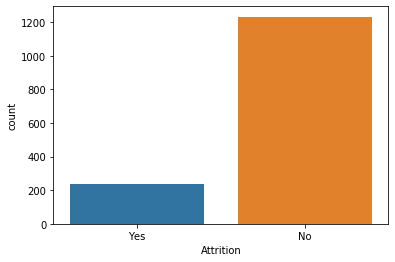

In [100]:
sns.countplot(data['Attrition'])
plt.show()

In [72]:
data.groupby(['Attrition']).count()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Attrition,,,,,,,,,,,,,,,,,,,,,
0,1233,1233,1233,1233,1233,1233,1233,1233,1233,1233,...,1233,1233,1233,1233,1233,1233,1233,1233,1233,1233
1,237,237,237,237,237,237,237,237,237,237,...,237,237,237,237,237,237,237,237,237,237


### Check the columns present in the dataset

In [101]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

# Feature Engineering

In [102]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

<b> From the above, we can see that there are 9 categorical data. Here we have to create dummy variables of them.</b>

In [6]:
BusinessTravel = pd.get_dummies(data['BusinessTravel'],drop_first=True)

In [7]:
Department = pd.get_dummies(data['Department'],drop_first=True)

In [8]:
EducationField = pd.get_dummies(data['EducationField'],drop_first=True)

In [9]:
Gender = pd.get_dummies(data['Gender'],drop_first=True)

In [10]:
JobRole  = pd.get_dummies(data['JobRole'],drop_first=True)

In [11]:
MaritalStatus = pd.get_dummies(data['MaritalStatus'],drop_first=True)

In [15]:
Train = data

In [16]:
def StrToBin(a):
    if a == 'Yes':
        return 1
    else:
        return 0
    

In [17]:
def StrToBinb(a):
    if a == 'Y':
        return 1
    else:
        return 0
    

In [18]:
Train['Attrition']=Train['Attrition'].apply(StrToBin)
#one at a time

In [19]:
Train['OverTime']=Train['OverTime'].apply(StrToBin)

In [20]:
Train['Over18']=Train['Over18'].apply(StrToBinb)

In [21]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

### Dropping redundant variables

In [22]:
Train.drop(['Department','EducationField','Gender','BusinessTravel','JobRole','MaritalStatus','JobLevel'],axis=1,inplace=True)

### Concat the spliited data into one.

In [23]:
Train = pd.concat([Train,Department,EducationField,Gender,BusinessTravel,JobRole,MaritalStatus],axis=1)

In [24]:
Train.columns

Index(['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
       'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction',
       'HourlyRate', 'JobInvolvement', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'Research & Development', 'Sales', 'Life Sciences', 'Marketing',
       'Medical', 'Other', 'Technical Degree', 'Male', 'Travel_Frequently',
       'Travel_Rarely', 'Human Resources', 'Laboratory Technician', 'Manager',
       'Manufacturing Director', 'Research Director', 'Research Scientist',
       'Sales Executive', 'Sales Representative', 'Married', 'Single'],
      dtype='object')

As we can see, there are many features in this data. Removing the features might lose information. Instead of feature selection, We are going to extract features from this data using Linear Discriminant Analysis.

In [25]:
m = list(Train.columns)
n = list(filter(lambda t: t not in ['Attrition'], m))

### Preparing X 

In [26]:
X = Train[n]
#y=X.pop('Attrition')

### Preparing y

In [27]:
y = Train['Attrition']

#  BASE MODEL : Logistic Regression Only

### Train Test Split

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

### Standardizing the variables

In [29]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

<a id=section6></a>
### Modelling and prediction

In [30]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(penalty='l2', solver='sag', C=1)
start_time = time.time()
fit1 = classifier.fit(X_train_sc, y_train)
end_time = time.time()
time2 = end_time-start_time
print(time2)

0.16389918327331543


In [31]:
y_pred = fit1.predict(X_test_sc)

In [32]:
from sklearn.metrics import confusion_matrix,classification_report
matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(matrix)
print(report)

[[360  11]
 [ 39  31]]
              precision    recall  f1-score   support

           0       0.90      0.97      0.94       371
           1       0.74      0.44      0.55        70

    accuracy                           0.89       441
   macro avg       0.82      0.71      0.74       441
weighted avg       0.88      0.89      0.87       441



#  MODEL 0: LDA only

In [33]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [35]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [36]:
lda_0 = LDA()
lda_0.fit(X_train_sc, y_train)
y_test_pred_0 = lda_0.predict(X_test_sc)

In [37]:
from sklearn.metrics import confusion_matrix,classification_report
cm_0 = confusion_matrix(y_test, y_test_pred_0)
cr_0 = classification_report(y_test, y_test_pred_0)

In [38]:
print(cm_0)
print(cr_0)

[[360  11]
 [ 39  31]]
              precision    recall  f1-score   support

           0       0.90      0.97      0.94       371
           1       0.74      0.44      0.55        70

    accuracy                           0.89       441
   macro avg       0.82      0.71      0.74       441
weighted avg       0.88      0.89      0.87       441



#  MODEL 1: LDA + Logistic Regression

#### Applying LDA

In [133]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [39]:
lda = LDA(n_components = 2)
X_train_1 = lda.fit_transform(X_train_sc, y_train)
X_test_1 = lda.transform(X_test_sc)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(47, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


#### Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(penalty='l2', solver='sag', C=1) #euc method
start_time = time.time()
fit1 = classifier.fit(X_train_1, y_train)
end_time = time.time()
time3 = end_time-start_time
print(time3)

0.011990547180175781


In [41]:
y_pred = fit1.predict(X_test_1)

#### Confusion Matrix and Classification Report

In [42]:
from sklearn.metrics import confusion_matrix,classification_report
cm_1 = confusion_matrix(y_test, y_pred)
cr_1 = classification_report(y_test, y_pred)

In [43]:
print(cm_1)
print(cr_1)

[[360  11]
 [ 40  30]]
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       371
           1       0.73      0.43      0.54        70

    accuracy                           0.88       441
   macro avg       0.82      0.70      0.74       441
weighted avg       0.87      0.88      0.87       441



<b>Applying LDA and then performing Logistic Regression gives us an accuracy score of 87%. 

<a id=section7></a>
### Computing time difference between two different logistic regression models created

In [44]:
time_diff = time3/time2
print(time_diff)

0.07315806546870068


<a id=section8></a>
## Applying KNN, SVM and Decision Tree and comparing using accuracy score

### Train Test Split

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
#will the split 80-20 or 70-30 change my F1 score? - Insignificant

<b>Applying LDA</b>

In [142]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [46]:
lda = LDA(n_components = 2,solver='eigen',shrinkage='auto')
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(47, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


# Model 2: LDA + KNN

In [47]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=11,weights='distance',algorithm='brute')
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='distance')

In [48]:
pred = knn.predict(X_test)

<b> Choosing the best K </b>

In [49]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

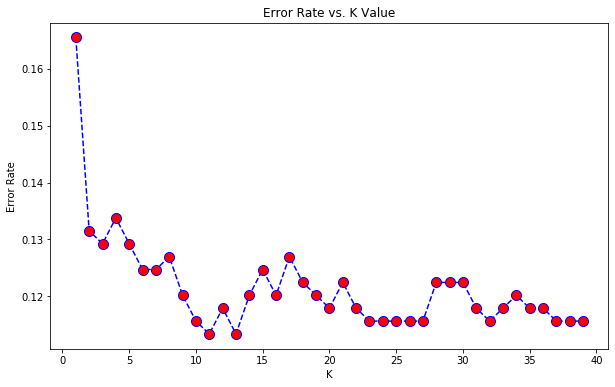

In [50]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

<b> Report </b>

In [51]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[350  21]
 [ 39  31]]
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       371
           1       0.60      0.44      0.51        70

    accuracy                           0.86       441
   macro avg       0.75      0.69      0.71       441
weighted avg       0.85      0.86      0.86       441



### Model Evaluation using accuracy score.

In [52]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, pred))

0.8639455782312925


--------------------------------------------------------------------------------------------------------------------------------

--------------------------------------------------------------------------------------------------------------------------------

#  MODEL 3: LDA + SVM

# Train Test Split

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

<b> Applying LDA </b>

In [54]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 2)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(47, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


In [55]:
from sklearn.svm import SVC
model = SVC(C=100,kernel = 'rbf')
model.fit(X_train,y_train)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [56]:
predictions = model.predict(X_test)

<b> Report </b>

In [57]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[360  11]
 [ 40  30]]
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       371
           1       0.73      0.43      0.54        70

    accuracy                           0.88       441
   macro avg       0.82      0.70      0.74       441
weighted avg       0.87      0.88      0.87       441



In [58]:
print(accuracy_score(y_test, predictions))

0.8843537414965986


# MODEL 4: LDA + Decision Tree

In [59]:
from sklearn.tree import DecisionTreeClassifier as DTC

In [60]:
dt = DTC(criterion='entropy',splitter='random')

In [61]:
tree = dt.fit(X_train,y_train)

In [62]:
pred_t = dt.predict(X_test)

In [63]:
cm = confusion_matrix(y_test,pred_t)

In [64]:
cr = classification_report(y_test,pred_t)

In [65]:
print(cm)
print(cr)

[[334  37]
 [ 37  33]]
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       371
           1       0.47      0.47      0.47        70

    accuracy                           0.83       441
   macro avg       0.69      0.69      0.69       441
weighted avg       0.83      0.83      0.83       441



In [66]:
print(accuracy_score(y_test, pred_t))

0.8321995464852607
